<a href="https://colab.research.google.com/github/groda/big_data/blob/master/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a href="https://github.com/groda/big_data"><div><img src="https://github.com/groda/big_data/blob/master/logo_bdb.png?raw=true" align=right width="90" alt="Logo Big Data for Beginners"></div></a>
# Polynomial regression with numpy and matplotlib

A worked out example of polynomial regression with `numpy` using `matplotlib` for visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Set a random seed

In [2]:
np.random.seed(12)

Set the number of data points `N` and the degree `D` of the polynomial that is going to fit to the data.

**Note:** for `D = 1` this is _linear regression_.

In [3]:
N = 100 # number of points
D = 2   # degree of polynomial

### Generate random data

To generate some random data that is suitable for polynomial regression we're going to use the following functions:
- [`np.random.uniform`](https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.uniform.html) draws samples from a uniform distribution
- [`np.random.sample`](https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.sample.html) returns random floats in the half-open interval $[0.0, 1.0)$.
- [`np.random.normal`](https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.normal.html) draws random samples from a normal (Gaussian) distribution.
- [`np.polyval`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyval.html)  evaluates a polynomial (defined by its coefficients) at the given points

We are first going to generate a set of $x$ values taken at random in a given range ($[-N, N[$).

The array `c` is used to store the coefficients of a random polynomial. To generate a random polynomial of degree $D$ we're going to generate $D$ random coefficients and set the coefficient of the leading term to $1$.

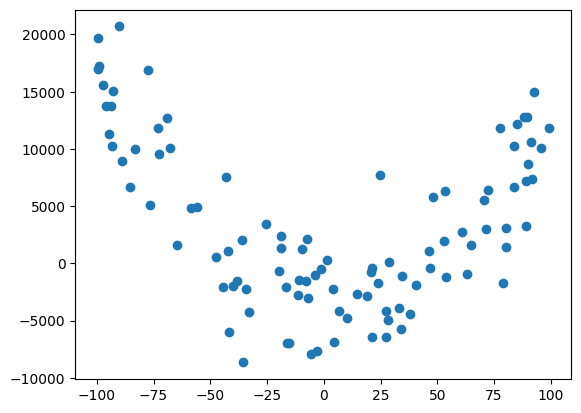

In [4]:
x = np.random.uniform(-N , N, N)    # x values are uniformly distributed between -100 and +100
c = 200*np.random.sample((D,))-100  # random polynomial coefficients drawn from the interval [-100, 100)
c = np.insert(c, 0, 1)              # first coeff. of the random poly is 1
y = np.polyval([1] + c, x)
noise = np.random.normal(-0.5*np.std(y), 0.5*np.std(y), N)  # some normally distributed noise
y += noise         # add noise to values
plt.scatter(x, y)
plt.show()

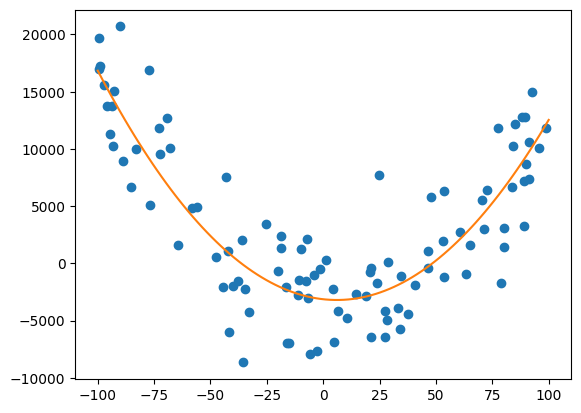

In [5]:
t = np.linspace(-N, N, num=N)
p = np.poly1d(np.polyfit(x, y, D))
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()

### How well did we approximate?

Show the coefficients of the approximating polynomial `p`.

In [6]:
np.set_printoptions(formatter={'float': '{: 12.6f}'.format})
print("Coefficients of p:     {}".format(p.c))
print("Original coefficients: {}".format(c))

Coefficients of p:     [    1.782148   -21.511448 -3135.140655]
Original coefficients: [    1.000000   -22.956604    19.148379]


Visualize the original polynomial `p_orig` and its approximation `p` obtained with polynomial regression.

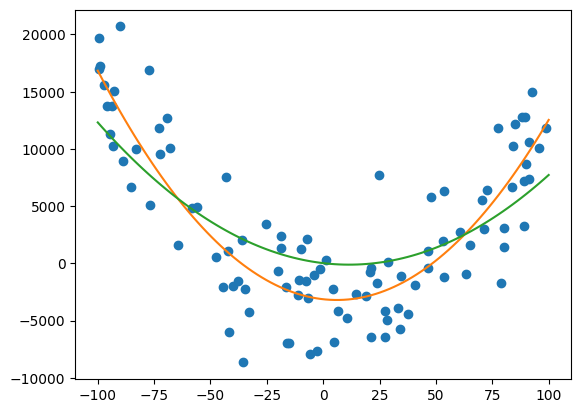

In [7]:
p_orig = np.poly1d(c)
plt.plot(x, y, 'o', t, p(t), '-', t, p_orig(t), '-')
plt.show()